In [1]:
# for gathering the data 
from sklearn.datasets import load_iris

# for plotting 
import matplotlib.pyplot as plt 

# for preprocessing
from sklearn.model_selection import train_test_split

# for making the model 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# for evaluating the model 
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Generate the data

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the data into train and test set 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

# Creating the model

In [4]:
# model creation 
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

#model training 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

# Performing predictions

In [5]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
pred_individual = clf.predict(X_train[0].reshape(1,4))
print(f'Prediction on individual data is {pred_individual[0]} against a label of {y_train[0]}')

Prediction on individual data is 0 against a label of 0


# Evaluating our model

In [6]:
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
f1_train = f1_score(y_true= y_train, y_pred=train_pred,average='macro')
f1_test = f1_score(y_true=y_test, y_pred=test_pred,average='macro')

In [7]:
print('Classification report on train set')
print(classification_report(y_true=y_train, y_pred=train_pred))

Classification report on train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.88      0.92        41
           2       0.88      0.97      0.93        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



# Tuning the hyperparameters

In [8]:
train_f1 = []
test_f1 = []

for i in range(1,11):
    clf_loop = DecisionTreeClassifier(max_depth=i, random_state=42) #create a model of i max depth
    clf_loop.fit(X_train, y_train) #train the model on train set
    train_pred_loop = clf_loop.predict(X_train) #predict for train set 
    test_pred_loop = clf_loop.predict(X_test) #predict for test set 
    train_f1_loop = f1_score(y_true=y_train, y_pred=train_pred_loop,average='macro') #calculate f1 for train set 
    test_f1_loop = f1_score(y_true=y_test, y_pred=test_pred_loop,average='macro') #calculate f1 for test set 
    train_f1.append(train_f1_loop) #append train set f1 for that particular depth 
    test_f1.append(test_f1_loop) #append test set f1 for that particular depth

In [9]:
iterations = [i for i in range(1,11)]

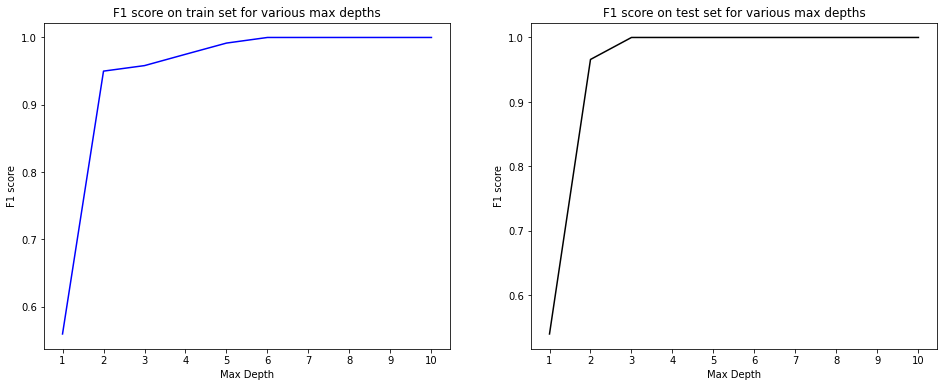

In [10]:
fig, ax = plt.subplots(figsize=(16,6),nrows=1, ncols=2)
ax[0].plot(iterations, train_f1, color='blue')
ax[0].set_xlabel('Max Depth')
ax[0].set_ylabel('F1 score')
ax[0].set_title('F1 score on train set for various max depths')
ax[0].set_xticks(iterations)
ax[1].plot(iterations, test_f1, color='black')
ax[1].set_xlabel('Max Depth')
ax[1].set_ylabel('F1 score')
ax[1].set_title('F1 score on test set for various max depths')
ax[1].set_xticks(iterations)
plt.show()

# Parameters for plot_tree 
1. clf - the classifier you want to plot 
2. ax - the matplotlib axis containing figure details like figsize
3. feature_names - The names of the columns in your dataset 
4. class_names - The labels corresponding to your y/target 
5. filled - Colors the boxes 

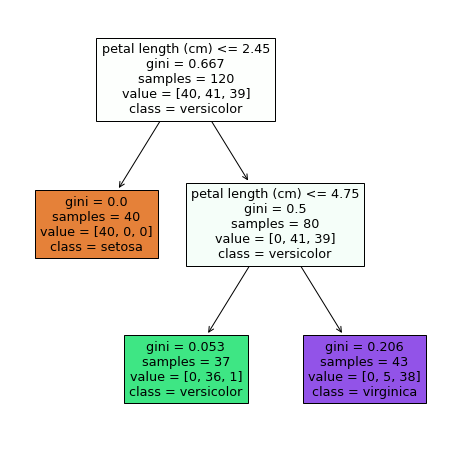

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
fn = iris.feature_names
cn = ['setosa', 'versicolor', 'virginica']
tree.plot_tree(clf,ax=ax,feature_names=fn, class_names=cn,filled=True)
plt.show()